In [1]:
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd
import xmltodict

ServiceKey="UexVaVO67QoqRtdj4Zud7P9tf2sY6tOkAYyE%2BInbCBvovMTeracLpWvf9vHyI8EvqgYVqD2aPyp0E2Y6LGAn3Q%3D%3D"

In [2]:
def getRequestUrl(url):
    req = urllib.request.Request(url)    
    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print("[%s] Url Request Success" %datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" %(datetime.datetime.now(), url))
        return None

In [3]:
def getData(location, locdate):
    service_url="http://apis.data.go.kr/B090041/openapi/service/RiseSetInfoService/getAreaRiseSetInfo"
    parameters="?location="+urllib.parse.quote(location)
    parameters+="&locdate="+locdate
    parameters+="&ServiceKey="+ServiceKey
    url=service_url+parameters
    
    retData=getRequestUrl(url)
    
    if retData==None:
        return None
    else:
        rd=xmltodict.parse(retData)
        re=json.dumps(rd)
        return json.loads(re)

In [4]:
def getService(city, date):
    jsonResult=[]
    result=[]
    dataEND="{0}12".format(str(date))

    for month in range(1,13):
        if month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
            day=31
        elif month==4 or month==6 or month==9 or month==11:
            day=30
        else:
            day=28
        for dd in range(1, day+1):
            yyyymm="{0}{1:0>2}{2:0>2}".format(str(date), str(month), str(dd))
            jsonData=getData(city, yyyymm)
            loca=jsonData['response']['body']['items']['item']['location']
            mm=jsonData['response']['body']['items']['item']['locdate']
            sunset=jsonData['response']['body']['items']['item']['sunset']
            hour=sunset[:2]
            minute=sunset[2:]
            ttt=datetime.time(int(hour), int(minute))
            date_time=ttt.strftime('%H:%M')
            print('[ %s_%s : 일몰시간 => %s]' %(loca, mm, date_time))
            print('----------------------------------------------------------------------')                
            jsonResult.append({'Location': loca, 'Date': mm, 'Sunset': date_time})
            result.append([loca, mm, date_time])
                
    return (jsonResult, result, city)

In [5]:
def main():
    jsonResult=[]
    result=[]
    name=''
    print("<< 매달 말일 일몰시간 데이터 수집 >>")
    city=input('지역을 입력하세요.[ex) 서울, 춘천, 독도, 부산, 등] : ')
    date=input('년도를 입력하세요.[ex) 2015~2021] : ')
    
    jsonResult, result, name=getService(city, date)

    if name=='':
        print('데이터가 전달되지 않았습니다. 공공데이터포털의 서비스 상태를 확인하기 바랍니다.')
    else:   
        with open('./%s_%s_sunset.json' %(name, date), 'w', encoding='utf8') as outfile:
            jsonFile=json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)
            outfile.write(jsonFile)
        columns=["지역명", "날짜", "일몰시간"]
        result_df=pd.DataFrame(result, columns=columns)
        result_df.to_csv('./%s_%s_sunset.csv' %(name, date), index=False, encoding='cp949')
        print('[json파일, csv파일] 저장완료')
        print('[ ##_yyyy년mm월dd일 : 일몰시간 => tt시mm분 ]')
        return (result_df, name, date)

In [6]:
df=[]
city=''
date=''
if __name__ == '__main__':
    df, city, date=main()

<< 매달 말일 일몰시간 데이터 수집 >>
지역을 입력하세요.[ex) 서울, 춘천, 독도, 부산, 등] : 독도
년도를 입력하세요.[ex) 2015~2021] : 2020
[2021-12-18 03:15:34.098358] Url Request Success
[ 독도_20200101 : 일몰시간 => 17:05]
----------------------------------------------------------------------
[2021-12-18 03:15:34.464355] Url Request Success
[ 독도_20200102 : 일몰시간 => 17:06]
----------------------------------------------------------------------
[2021-12-18 03:15:34.642533] Url Request Success
[ 독도_20200103 : 일몰시간 => 17:07]
----------------------------------------------------------------------
[2021-12-18 03:15:34.904593] Url Request Success
[ 독도_20200104 : 일몰시간 => 17:08]
----------------------------------------------------------------------
[2021-12-18 03:15:35.283287] Url Request Success
[ 독도_20200105 : 일몰시간 => 17:08]
----------------------------------------------------------------------
[2021-12-18 03:15:35.457808] Url Request Success
[ 독도_20200106 : 일몰시간 => 17:09]
---------------------------------------------------------------------

[2021-12-18 03:15:49.378144] Url Request Success
[ 독도_20200224 : 일몰시간 => 18:01]
----------------------------------------------------------------------
[2021-12-18 03:15:49.541029] Url Request Success
[ 독도_20200225 : 일몰시간 => 18:02]
----------------------------------------------------------------------
[2021-12-18 03:15:49.952911] Url Request Success
[ 독도_20200226 : 일몰시간 => 18:03]
----------------------------------------------------------------------
[2021-12-18 03:15:50.133427] Url Request Success
[ 독도_20200227 : 일몰시간 => 18:04]
----------------------------------------------------------------------
[2021-12-18 03:15:50.356329] Url Request Success
[ 독도_20200228 : 일몰시간 => 18:05]
----------------------------------------------------------------------
[2021-12-18 03:15:50.514552] Url Request Success
[ 독도_20200301 : 일몰시간 => 18:07]
----------------------------------------------------------------------
[2021-12-18 03:15:50.726216] Url Request Success
[ 독도_20200302 : 일몰시간 => 18:08]
--------------

[2021-12-18 03:16:01.341656] Url Request Success
[ 독도_20200421 : 일몰시간 => 18:53]
----------------------------------------------------------------------
[2021-12-18 03:16:01.518184] Url Request Success
[ 독도_20200422 : 일몰시간 => 18:54]
----------------------------------------------------------------------
[2021-12-18 03:16:01.709874] Url Request Success
[ 독도_20200423 : 일몰시간 => 18:55]
----------------------------------------------------------------------
[2021-12-18 03:16:02.033228] Url Request Success
[ 독도_20200424 : 일몰시간 => 18:56]
----------------------------------------------------------------------
[2021-12-18 03:16:02.214784] Url Request Success
[ 독도_20200425 : 일몰시간 => 18:57]
----------------------------------------------------------------------
[2021-12-18 03:16:02.378354] Url Request Success
[ 독도_20200426 : 일몰시간 => 18:57]
----------------------------------------------------------------------
[2021-12-18 03:16:02.541892] Url Request Success
[ 독도_20200427 : 일몰시간 => 18:58]
--------------

[2021-12-18 03:16:13.546682] Url Request Success
[ 독도_20200616 : 일몰시간 => 19:35]
----------------------------------------------------------------------
[2021-12-18 03:16:13.950918] Url Request Success
[ 독도_20200617 : 일몰시간 => 19:35]
----------------------------------------------------------------------
[2021-12-18 03:16:14.090230] Url Request Success
[ 독도_20200618 : 일몰시간 => 19:36]
----------------------------------------------------------------------
[2021-12-18 03:16:14.292718] Url Request Success
[ 독도_20200619 : 일몰시간 => 19:36]
----------------------------------------------------------------------
[2021-12-18 03:16:14.428326] Url Request Success
[ 독도_20200620 : 일몰시간 => 19:36]
----------------------------------------------------------------------
[2021-12-18 03:16:14.709271] Url Request Success
[ 독도_20200621 : 일몰시간 => 19:36]
----------------------------------------------------------------------
[2021-12-18 03:16:15.189890] Url Request Success
[ 독도_20200622 : 일몰시간 => 19:36]
--------------

[2021-12-18 03:16:26.977787] Url Request Success
[ 독도_20200811 : 일몰시간 => 19:09]
----------------------------------------------------------------------
[2021-12-18 03:16:27.127482] Url Request Success
[ 독도_20200812 : 일몰시간 => 19:08]
----------------------------------------------------------------------
[2021-12-18 03:16:27.388699] Url Request Success
[ 독도_20200813 : 일몰시간 => 19:07]
----------------------------------------------------------------------
[2021-12-18 03:16:27.635075] Url Request Success
[ 독도_20200814 : 일몰시간 => 19:06]
----------------------------------------------------------------------
[2021-12-18 03:16:27.812387] Url Request Success
[ 독도_20200815 : 일몰시간 => 19:05]
----------------------------------------------------------------------
[2021-12-18 03:16:28.112480] Url Request Success
[ 독도_20200816 : 일몰시간 => 19:03]
----------------------------------------------------------------------
[2021-12-18 03:16:28.268088] Url Request Success
[ 독도_20200817 : 일몰시간 => 19:02]
--------------

[2021-12-18 03:16:38.474591] Url Request Success
[ 독도_20201005 : 일몰시간 => 17:50]
----------------------------------------------------------------------
[2021-12-18 03:16:38.636066] Url Request Success
[ 독도_20201006 : 일몰시간 => 17:48]
----------------------------------------------------------------------
[2021-12-18 03:16:38.780208] Url Request Success
[ 독도_20201007 : 일몰시간 => 17:47]
----------------------------------------------------------------------
[2021-12-18 03:16:38.944959] Url Request Success
[ 독도_20201008 : 일몰시간 => 17:46]
----------------------------------------------------------------------
[2021-12-18 03:16:39.232848] Url Request Success
[ 독도_20201009 : 일몰시간 => 17:44]
----------------------------------------------------------------------
[2021-12-18 03:16:39.395693] Url Request Success
[ 독도_20201010 : 일몰시간 => 17:43]
----------------------------------------------------------------------
[2021-12-18 03:16:39.551992] Url Request Success
[ 독도_20201011 : 일몰시간 => 17:41]
--------------

[2021-12-18 03:16:49.892735] Url Request Success
[ 독도_20201129 : 일몰시간 => 16:56]
----------------------------------------------------------------------
[2021-12-18 03:16:50.155613] Url Request Success
[ 독도_20201130 : 일몰시간 => 16:55]
----------------------------------------------------------------------
[2021-12-18 03:16:50.499822] Url Request Success
[ 독도_20201201 : 일몰시간 => 16:55]
----------------------------------------------------------------------
[2021-12-18 03:16:51.163021] Url Request Success
[ 독도_20201202 : 일몰시간 => 16:55]
----------------------------------------------------------------------
[2021-12-18 03:16:51.398271] Url Request Success
[ 독도_20201203 : 일몰시간 => 16:55]
----------------------------------------------------------------------
[2021-12-18 03:16:51.800886] Url Request Success
[ 독도_20201204 : 일몰시간 => 16:55]
----------------------------------------------------------------------
[2021-12-18 03:16:52.211468] Url Request Success
[ 독도_20201205 : 일몰시간 => 16:55]
--------------

In [7]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


In [8]:
li=[]
df['날짜+시간']=date+'0101'+df['일몰시간']
for ii in df['날짜+시간']:
    ttt=time.strptime(ii,'%Y%m%d%H:%M')
    tsts=time.mktime(ttt)
    li.append(tsts)
df['일몰시간_int']=li

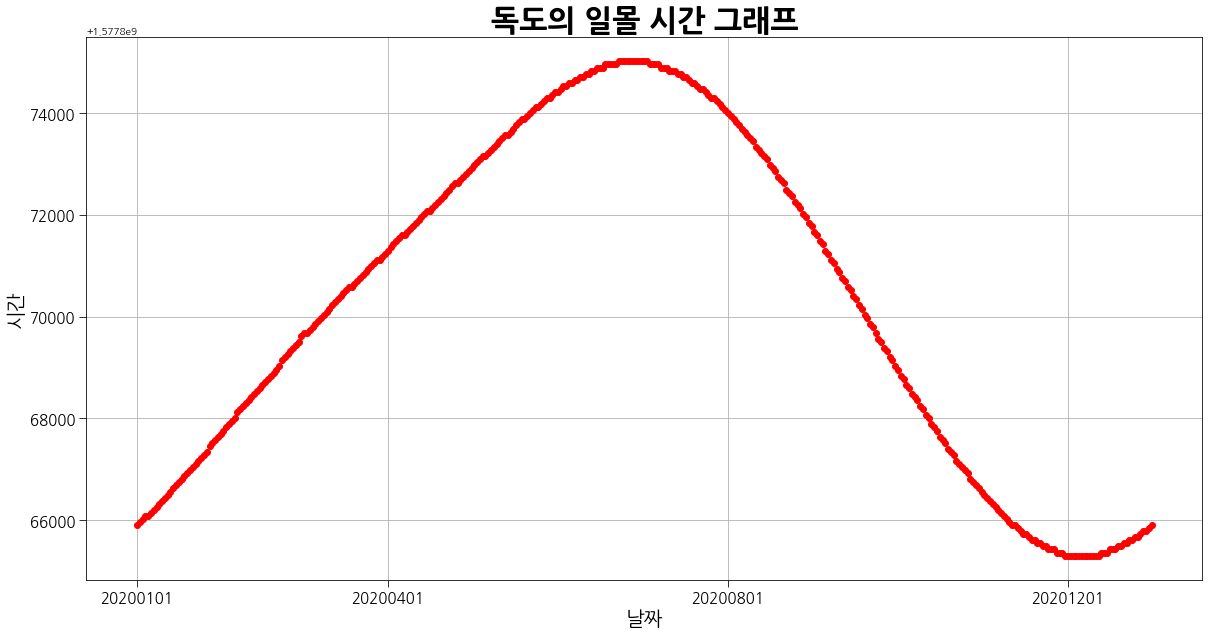

In [9]:
flt=plt.figure(figsize=(20, 10))
plo=flt.add_subplot(111)
plo.plot(df['날짜'], df['일몰시간_int'], 'ro')

plt.xlabel('날짜', fontsize=20)#, color='white')
plt.ylabel('시간', fontsize=20)#, color='white')
plt.tick_params(labelsize=15, size=7)#, colors='white')
plt.xticks([date+'0101',date+'0401',date+'0801',date+'1201'])
plt.title('{}의 일몰 시간 그래프'.format(city), fontsize=30, fontweight='bold')#, color='white')
plt.grid(True)
# plt.show()
plt.savefig('./sunset.jpg')

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [11]:
Y=df['일몰시간_int']
X=df['날짜']
X=np.array(X).reshape(-1,1)

In [12]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=0)

In [13]:
lr=LinearRegression()

In [14]:
lr.fit(X_train, Y_train)

LinearRegression()

In [15]:
Y_predict=lr.predict(X_test)

In [16]:
print('Y 절편 값 : ', lr.intercept_)
print('회귀 계수 값 : ', np.round(lr.coef_, 1))

Y 절편 값 :  1631512386.292331
회귀 계수 값 :  [-2.7]


In [17]:
import seaborn as sns

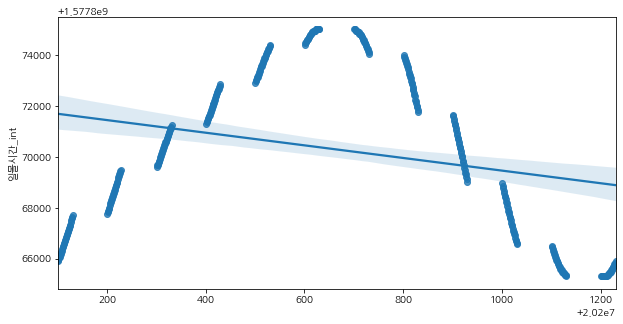

In [18]:
axs=plt.subplots(figsize=(10,5))
x_features=df['날짜']
x_features=np.array(x_features, dtype=np.int32).reshape(1,365)
for feature in x_features:
    sns.regplot(x=feature, y='일몰시간_int', data=df)

# plt.tick_params(colors='white')
plt.savefig('./regression.jpg')